### Investigate if participants allocate more cubes for:
- NVC or non-NVC robot?
- robot B or A?

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER
invalid_participants = [1,4,18]

['seaborn-deep', 'ggplot', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-dark', 'bmh', '_classic_test', 'seaborn-paper', 'seaborn', 'seaborn-poster', 'seaborn-ticks', 'seaborn-pastel', 'classic', 'seaborn-dark-palette', 'seaborn-talk', 'seaborn-notebook', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-whitegrid', 'grayscale', 'dark_background', 'fast', 'tableau-colorblind10', 'seaborn-colorblind', 'seaborn-bright']


In [2]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for path in Path(DATA_PATH).rglob('participant_*.csv'):
    participant_id = int(re.search(r'\d+', path.name).group())
    if participant_id in invalid_participants:
        continue
    temp = pd.read_csv(path)
    temp["scene"] = temp["scene"].str[-1:]
    temp["scene"] = temp["scene"].astype('int')
    temp["participant"] = participant_id
    temp["NVC_A"] = False
    temp["NVC_B"] = False
    
    if int(participant_id) % 2 == 0:
        nvc = "A"
        temp["NVC_A"] = True
    else:
        nvc = "B"
        temp["NVC_B"] = True

    temp["NVC"] = nvc
    dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
raw_data

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC
0,0,0,0,19,False,True,B
1,1,2,2,19,False,True,B
2,2,1,4,19,False,True,B
3,3,3,2,19,False,True,B
4,4,7,0,19,False,True,B
...,...,...,...,...,...,...,...
115,0,0,0,25,False,True,B
116,1,0,2,25,False,True,B
117,2,4,0,25,False,True,B
118,3,3,2,25,False,True,B


In [4]:
# Find the total amount of cubes that participants allocated
cubes_per_participant = raw_data.groupby("participant").sum()
cubes_per_participant = cubes_per_participant.drop(columns=['scene'])
cubes_per_participant['total_cubes'] = cubes_per_participant['robot_a'] + cubes_per_participant['robot_b'] 
cubes_per_participant

,robot_a,robot_b,NVC_A,NVC_B,total_cubes
participant,,,,,
2,9,9,5.0,0.0,18
3,14,13,0.0,5.0,27
5,11,15,0.0,5.0,26
6,2,18,5.0,0.0,20
7,9,19,0.0,5.0,28
8,11,13,5.0,0.0,24
9,13,13,0.0,5.0,26
10,9,16,5.0,0.0,25
11,5,8,0.0,5.0,13


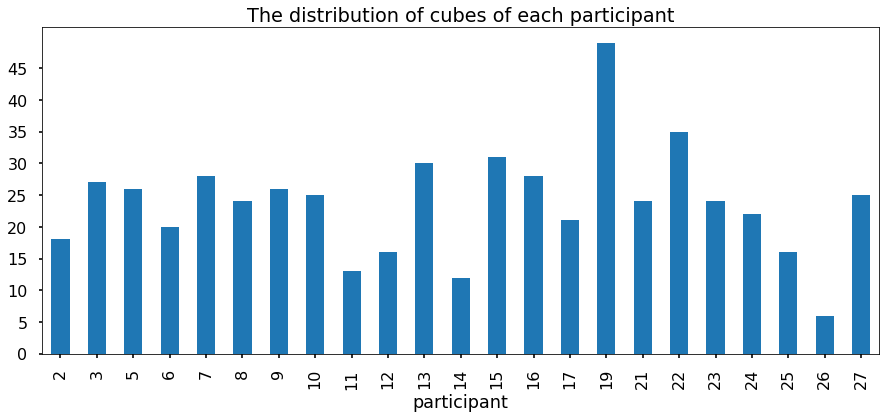

In [5]:
cubes_per_participant_plot_data = cubes_per_participant.drop(columns=['robot_a', 'robot_b', 'NVC_A', 'NVC_B'])
cubes_per_participant_plot_data.plot(kind = 'bar', yticks=range(0, 50, 5), figsize=(15,6), title="The distribution of cubes of each participant", legend=False)

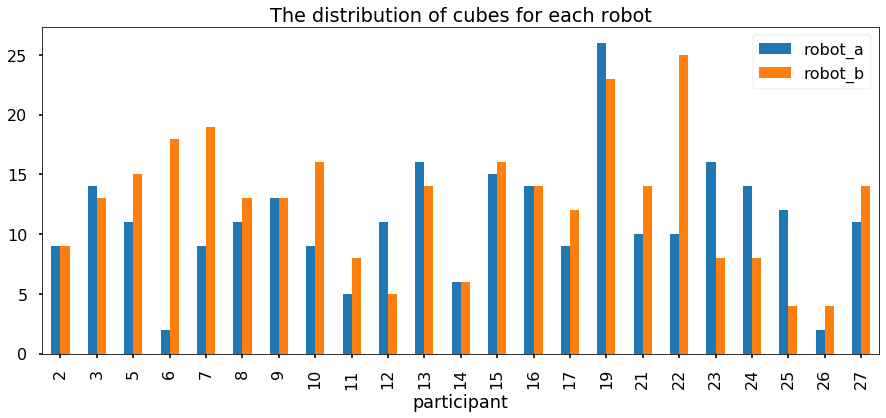

In [6]:
cubes_per_participant_plot_data = cubes_per_participant.drop(columns=['NVC_A', 'NVC_B', 'total_cubes'])
cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot")

# Let's compare if two sample means differ from each other considering only robot types: A and B

## Normality test 
### Distribution of cubes allocation for scene 0 and scene 1

In [7]:
df_scene_0 = raw_data[(raw_data["scene"] == 0)]
df_scene_1 = raw_data[(raw_data["scene"] == 1)]
df_scene_2 = raw_data[(raw_data["scene"] == 2)]
df_scene_3 = raw_data[(raw_data["scene"] == 3)]
df_scene_4 = raw_data[(raw_data["scene"] == 4)]

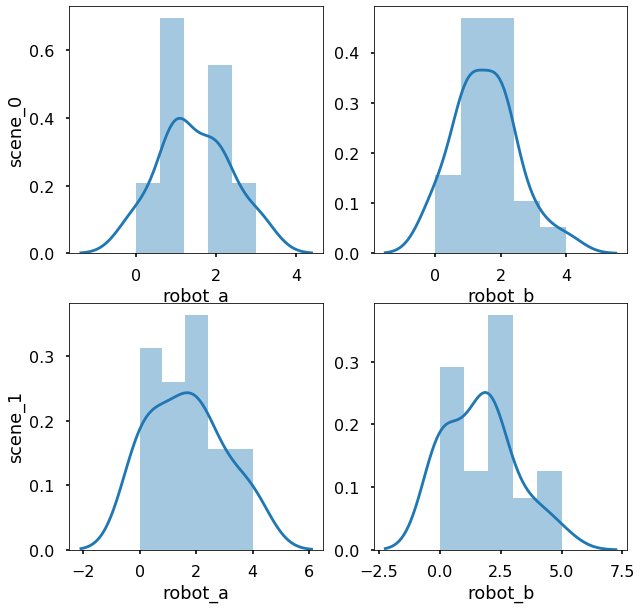

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_0")
ax[1][0].set_ylabel("scene_1")
sns.distplot(df_scene_0["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(df_scene_0["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(df_scene_1["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(df_scene_1["robot_b"], bins=5, ax=ax[1][1])

## Distribution of cubes allocation for scene 2, 3, 4

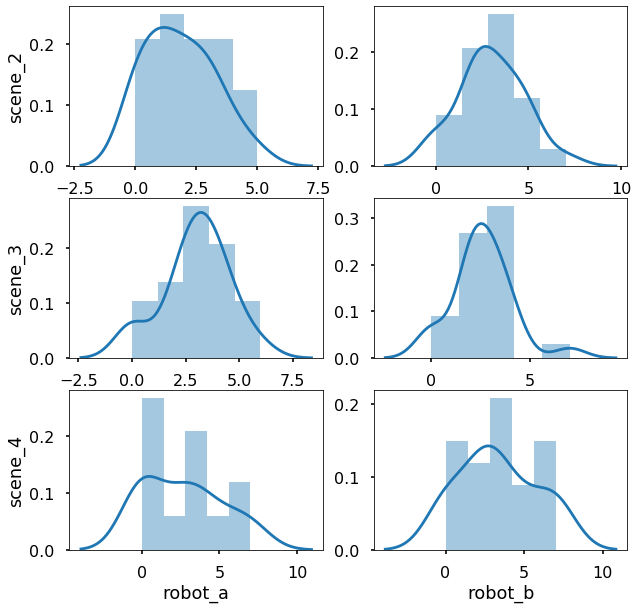

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_2")
ax[1][0].set_ylabel("scene_3")
ax[2][0].set_ylabel("scene_4")
sns.distplot(df_scene_2["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(df_scene_2["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(df_scene_3["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(df_scene_3["robot_b"], bins=5, ax=ax[1][1])
sns.distplot(df_scene_4["robot_a"], bins=5, ax=ax[2][0])
sns.distplot(df_scene_4["robot_b"], bins=5, ax=ax[2][1])

## Test if a sample comes from a normal distribution

In [10]:
stats.normaltest(df_scene_0["robot_a"])

NormaltestResult(statistic=0.3088308029150485, pvalue=0.8569159829189256)

In [11]:
stats.normaltest(df_scene_0["robot_b"])

NormaltestResult(statistic=1.7195916427959572, pvalue=0.4232484917813264)

In [12]:
stats.normaltest(df_scene_1["robot_a"])

NormaltestResult(statistic=1.8883787289441603, pvalue=0.3889947761119127)

In [13]:
stats.normaltest(df_scene_1["robot_b"])

NormaltestResult(statistic=1.446377587660156, pvalue=0.48520257548830126)

In [14]:
stats.normaltest(df_scene_2["robot_a"])

NormaltestResult(statistic=1.2103478718095673, pvalue=0.5459794529501394)

In [15]:
stats.normaltest(df_scene_2["robot_b"])

NormaltestResult(statistic=0.1534103213460232, pvalue=0.9261628825956619)

In [16]:
stats.normaltest(df_scene_3["robot_a"])

NormaltestResult(statistic=1.426879339435529, pvalue=0.48995600887308477)

In [17]:
stats.normaltest(df_scene_3["robot_b"])

NormaltestResult(statistic=6.010594645296679, pvalue=0.0495240275242262)

In [18]:
stats.normaltest(df_scene_4["robot_a"])

NormaltestResult(statistic=3.5982645170147105, pvalue=0.16544238717657891)

In [19]:
stats.normaltest(df_scene_4["robot_b"])

NormaltestResult(statistic=2.5605140694320334, pvalue=0.27796584439836686)

#### Conclusion: As one can see the results show the tendency towards a normal distribution for some scenes and robots, especially for robot B in scene 2

## Wilcoxon Test

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

### scene 1

In [20]:
stats.wilcoxon(df_scene_1["robot_a"], df_scene_1["robot_b"])

WilcoxonResult(statistic=73.5, pvalue=0.8849027081456364)

### scene 2

In [21]:
stats.wilcoxon(df_scene_2["robot_a"], df_scene_2["robot_b"])

WilcoxonResult(statistic=49.5, pvalue=0.06502604632853234)

### scene 3

In [22]:
stats.wilcoxon(df_scene_3["robot_a"], df_scene_3["robot_b"])

WilcoxonResult(statistic=61.0, pvalue=0.15841984374008777)

### scene 4

In [23]:
stats.wilcoxon(df_scene_4["robot_a"], df_scene_4["robot_b"])

WilcoxonResult(statistic=77.5, pvalue=0.47706218375860343)

### Conclusion
Both scene 1 & 2 p-value >= 0.05, accept h0: There is no difference between a robot A and robot B. But p-value for the scene 2 is close to 0.05.

## Pair t-test

### scene 1

In [24]:
stats.ttest_rel(df_scene_1["robot_a"], df_scene_1["robot_b"])

Ttest_relResult(statistic=0.0, pvalue=1.0)

### scene 2

In [25]:
stats.ttest_rel(df_scene_2["robot_a"], df_scene_2["robot_b"])

Ttest_relResult(statistic=-2.144761058952722, pvalue=0.04276595739013089)

### scene 3

In [26]:
stats.ttest_rel(df_scene_3["robot_a"], df_scene_3["robot_b"])

Ttest_relResult(statistic=0.8658371987612918, pvalue=0.395521673953245)

### scene 4

In [27]:
stats.ttest_rel(df_scene_4["robot_a"], df_scene_4["robot_b"])

Ttest_relResult(statistic=-0.6807907685397674, pvalue=0.5028007184242287)

### Conclusion
#### Scene 1, 3, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 2 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# So far we have compared if two sample means differ from each other considering only robot types: A and B. Let's compare now NVC and non-NVC robots

In [28]:
data_nvc_a = raw_data[raw_data['NVC_A'] == True]
data_nvc_a = data_nvc_a[['scene', 'robot_a', 'robot_b']]
data_nvc_a.head()

,scene,robot_a,robot_b
5,0,1,1
6,1,4,2
7,2,3,3
8,3,3,4
9,4,3,4


In [29]:
data_nvc_b = raw_data[raw_data['NVC_B'] == True]
data_nvc_b = data_nvc_b[['scene', 'robot_a', 'robot_b']]
data_nvc_b.head()

,scene,robot_a,robot_b
0,0,0,0
1,1,2,2
2,2,1,4
3,3,3,2
4,4,7,0


In [30]:
stats.ttest_rel(data_nvc_a[data_nvc_a['scene'] == 2]["robot_a"], data_nvc_a[data_nvc_a['scene'] == 2]["robot_b"])

Ttest_relResult(statistic=-2.631174057921088, pvalue=0.027306040367697303)

In [31]:
stats.ttest_rel(data_nvc_b[data_nvc_b['scene'] == 2]["robot_a"], data_nvc_b[data_nvc_b['scene'] == 2]["robot_b"])

Ttest_relResult(statistic=-0.7731113434850683, pvalue=0.4532851384272234)

## Conclusion: when the robot A is an NVC-robot in scene 2 there is a difference between expected values of A and B

# Let's do analysis using plots
### Approach: Calculate the significance of allocated cubes as:
- the number of allocated cubes to one robot divided by the sum of allocated cubes to both robots 

In [32]:
approach1 = raw_data.copy()
approach1["sum_cubes_a_and_b"] = approach1["robot_a"] + approach1["robot_b"]
approach1["significance_A"] = approach1["robot_a"] / approach1["sum_cubes_a_and_b"]
approach1["significance_B"] = approach1["robot_b"] / approach1["sum_cubes_a_and_b"]
approach1

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,sum_cubes_a_and_b,significance_A,significance_B
0,0,0,0,19,False,True,B,0,NaN,NaN
1,1,2,2,19,False,True,B,4,0.5,0.5
2,2,1,4,19,False,True,B,5,0.2,0.8
3,3,3,2,19,False,True,B,5,0.6,0.4
4,4,7,0,19,False,True,B,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,25,False,True,B,0,NaN,NaN
116,1,0,2,25,False,True,B,2,0.0,1.0
117,2,4,0,25,False,True,B,4,1.0,0.0
118,3,3,2,25,False,True,B,5,0.6,0.4


In [33]:
approach1_plot_data = approach1.groupby(['scene']).mean()
approach1_plot_data = approach1_plot_data.drop(columns=['robot_a', 'robot_b', 'participant', 'sum_cubes_a_and_b',  'NVC_A', 'NVC_B'])
approach1_plot_data

,significance_A,significance_B
scene,,
0,0.488662,0.511338
1,0.511786,0.488214
2,0.382505,0.617495
3,0.542029,0.457971
4,0.423611,0.576389


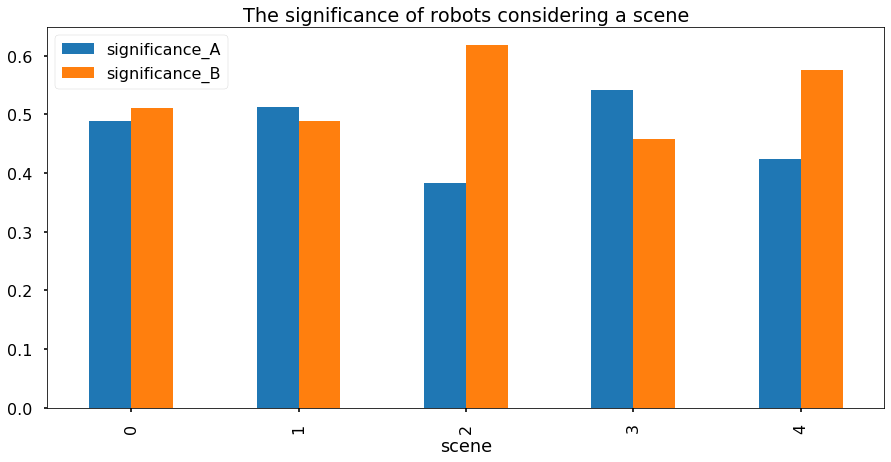

In [34]:
approach1_plot_data.plot(kind='bar', figsize=(15,7), title='The significance of robots considering a scene')

In [35]:
approach1_plot_data = approach1.groupby(['scene', 'NVC']).mean()
approach1_plot_data = approach1_plot_data.drop(columns=['robot_a', 'robot_b', 'participant', 'sum_cubes_a_and_b',  'NVC_A', 'NVC_B'])
approach1_plot_data

significance_A  significance_B
scene NVC                                
0     A          0.492063        0.507937
      B          0.486111        0.513889
1     A          0.686508        0.313492
      B          0.436905        0.563095
2     A          0.273810        0.726190
      B          0.452381        0.547619
3     A          0.503175        0.496825
      B          0.567007        0.432993
4     A          0.359524        0.640476
      B          0.469388        0.530612

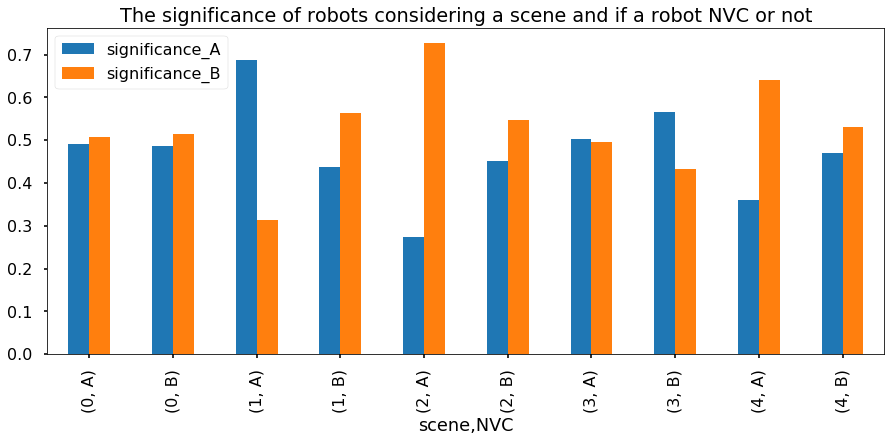

In [36]:
approach1_plot_data.plot(kind='bar', figsize=(15,6), title='The significance of robots considering a scene and if a robot NVC or not')

In [37]:
def get_significance(row):
   if row['NVC'] == 'A' :
      return row['significance_A']
   if row['NVC'] == 'B' :
      return row['significance_B']
   return 0.0
approach1['significance'] = approach1.apply(lambda row: get_significance(row), axis=1)

In [38]:
approach1

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,sum_cubes_a_and_b,significance_A,significance_B,significance
0,0,0,0,19,False,True,B,0,NaN,NaN,NaN
1,1,2,2,19,False,True,B,4,0.5,0.5,0.5
2,2,1,4,19,False,True,B,5,0.2,0.8,0.8
3,3,3,2,19,False,True,B,5,0.6,0.4,0.4
4,4,7,0,19,False,True,B,7,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,25,False,True,B,0,NaN,NaN,NaN
116,1,0,2,25,False,True,B,2,0.0,1.0,1.0
117,2,4,0,25,False,True,B,4,1.0,0.0,0.0
118,3,3,2,25,False,True,B,5,0.6,0.4,0.4


# Correlation between NVC and significance. Only scene 2

In [39]:
data_corr = approach1[approach1['scene']==2]
data_corr = data_corr[['NVC','significance']]
data_corr.NVC = pd.Categorical(data_corr.NVC)
data_corr['NVC_encoded'] = data_corr.NVC.cat.codes
data_corr

,NVC,significance,NVC_encoded
2,B,0.800000,1
7,A,0.500000,0
12,A,0.285714,0
17,B,0.750000,1
22,B,0.000000,1
27,B,0.800000,1
32,B,0.666667,1
37,B,0.750000,1
42,A,0.000000,0
47,A,0.250000,0


In [40]:
data_corr.corr()

,significance,NVC_encoded
significance,1.000000,0.450669
NVC_encoded,0.450669,1.000000
